In [3]:
from runLSTM import buildRunLSTM
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
import pickle
import pandas as pd

In [4]:
with open("data/traindata_01.pkl", "rb") as input_file:
    generated_data = pickle.load(input_file)

list_tuples = [x for x in generated_data]

In [5]:
b = buildRunLSTM()
X, y, max_features, maxlen, labels = b.read_data(list_tuples)

In [87]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
csv_data = scaler.fit_transform(X[1:1000000])


In [56]:
#for testing

csv_data_test = scaler.transform(X[1900001:2000010])
testX = csv_data_test.reshape(csv_data_test.shape[0], maxlen, 1)


In [29]:
testX.shape

(9, 59, 1)

In [58]:
X_training, X_testing, y_training, y_testing, _, label_testing = train_test_split(testX, y[1900001:2000010], labels[1900001:2000010], test_size=0.1)


In [88]:
X2 = csv_data.reshape(csv_data.shape[0], maxlen, 1)

X_train, X_test, y_train, y_test, _, label_test = train_test_split(X2, y[1:1000000], labels[1:1000000], test_size=0.2)

In [12]:
X_train[0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.   

In [ ]:
# reshape X to be [samples, time steps, features]
#X2 = np.reshape(X, (len(X), maxlen, 1))
# normalize
#X2 = X2 / float(max_features)
# one hot encode the output variable
#y = np_utils.to_categorical(dataY)

In [ ]:
#X2 = X.reshape(X.shape[0], maxlen, 1)
#X2 = X2 / float(max_features)

In [ ]:
def _load_data(data, n_prev = 1):
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

def train_test_split_own(df, test_size=0.4):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))
    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

def pred_data(df):  
    X_pred, y_pred = _load_data(df)
    return (X_pred, y_pred)

In [ ]:
(X_train, y_train), (X_test, y_test) = train_test_split_own(data)  # retrieve data
#(nX_train, ny_train), (nX_test, ny_test) = train_test_split_own(data)  # retrieve data

In [ ]:
X_train[0]

In [ ]:
#for fold in range(1):

X_train, X_test, y_train, y_test, _, label_test = train_test_split(X[1:100000], y[1:100000], labels[1:100000], test_size=0.2)
#X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.05)
 

In [ ]:
X_train[0]

In [13]:

from keras.layers import Input, LSTM, RepeatVector, Dropout
from keras.models import Model
from keras.layers import TimeDistributed

latent_dim = 500 #hidden layer size
timesteps = 59 #time step per sample
input_dim = 1 #feature size, MUST MATCH ROW OF UNIQUE_FRAME

#Build autoencoder
#inputs = Input(shape=(timesteps, input_dim))
#encoded = LSTM(latent_dim, return_sequences=True)(inputs)
#encoded = Dropout(0.2)(encoded)
#encoded = LSTM(latent_dim, activation='tanh')(encoded)
#encoder = Model(inputs, encoded)
#encoder.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
#encoder.summary()


#this code compiles and trains works
#timesteps = X_train.shape[1]
#input_dim = 1
#inputs = Input(shape=(timesteps, input_dim))
#encoded = LSTM(32,return_sequences = True)(inputs)
#encoded = LSTM(32,return_sequences = True)(encoded)
#encoded = LSTM(32)(encoded)
##encoded = LSTM(input_dim,return_sequences = True)(encoded)
#decoded = RepeatVector(timesteps)(encoded) 
#decoded =  LSTM(32, return_sequences = True)(decoded)                                   
#decoded =  LSTM(32,return_sequences = True)(decoded)
#decoded =  LSTM(input_dim,return_sequences = True)(decoded)
#sequence_autoencoder = Model(inputs, decoded)
##sequence_autoencoder = Model(inputs, encoded)
#sequence_autoencoder.compile(loss='mean_squared_error', optimizer='Adam')
#sequence_autoencoder.summary()

timesteps = X_train.shape[1]
n_features = X_train.shape[2] 
encoding_dim = 62
hidden_dim = int(encoding_dim / 2)

lstm_autoencoder = Sequential()
# Encoder
lstm_autoencoder.add(LSTM(encoding_dim, input_shape=(timesteps, n_features), return_sequences=True))
lstm_autoencoder.add(LSTM(hidden_dim, return_sequences=False))
lstm_autoencoder.add(RepeatVector(timesteps))
# Decoder
lstm_autoencoder.add(LSTM(hidden_dim, return_sequences=True))
lstm_autoencoder.add(LSTM(hidden_dim, return_sequences=True))
lstm_autoencoder.add(TimeDistributed(Dense(n_features)))

lstm_autoencoder.summary()
lstm_autoencoder.compile(loss='mse', optimizer='adam')

#works too, but it is not LSTM
#input_dim = X_train.shape[1] #num of predictor variables, 
#encoding_dim = 128
#hidden_dim = int(encoding_dim / 2)

#input_layer = Input(shape=(input_dim, ))
#encoder = Dense(encoding_dim, activation="relu")(input_layer)
#encoder = Dense(hidden_dim, activation="relu")(encoder)
#decoder = Dense(hidden_dim, activation="relu")(encoder)
#decoder = Dense(encoding_dim, activation="relu")(decoder)
#decoder = Dense(input_dim, activation="linear")(decoder)
#autoencoder = Model(inputs=input_layer, outputs=decoder)
#autoencoder.summary()
#autoencoder.compile(metrics=['accuracy'],
#                    loss='mean_squared_error',
#                    optimizer='adam')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 59, 62)            15872     
_________________________________________________________________
lstm_2 (LSTM)                (None, 31)                11656     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 59, 31)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 59, 31)            7812      
_________________________________________________________________
lstm_4 (LSTM)                (None, 59, 31)            7812      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 59, 1)             32        
Total params: 43,184
Trainable params: 43,184
Non-trainable params: 0
_________________________________________________________________


In [14]:
lstm_autoencoder.fit(X_train, X_train,
                     epochs=200,
                     batch_size=128)

Epoch 1/200
799999/799999 [==============================] - 3262s 4ms/step - loss: 0.0115
Epoch 2/200
799999/799999 [==============================] - 3253s 4ms/step - loss: 0.0070
Epoch 3/200
799999/799999 [==============================] - 3245s 4ms/step - loss: 0.0046
Epoch 4/200
799999/799999 [==============================] - 3242s 4ms/step - loss: 0.0031
Epoch 5/200
799999/799999 [==============================] - 3252s 4ms/step - loss: 0.0021
Epoch 6/200
799999/799999 [==============================] - 3252s 4ms/step - loss: 0.0015
Epoch 7/200
799999/799999 [==============================] - 3250s 4ms/step - loss: 0.0019
Epoch 8/200
799999/799999 [==============================] - 3252s 4ms/step - loss: 0.0014
Epoch 9/200
799999/799999 [==============================] - 3255s 4ms/step - loss: 0.0010
Epoch 10/200
799999/799999 [==============================] - 3250s 4ms/step - loss: 6.8758e-04
Epoch 11/200
799999/799999 [==============================] - 3259s 4ms/step - loss: 

KeyboardInterrupt: 

In [19]:
test = np.random.rand(59, 1)
X_train[0] = test

In [60]:
X_training.shape

(44874, 59, 1)

In [89]:
prediction = lstm_autoencoder.predict(X_train[0:50000])

In [82]:
import pandas as pd
from scipy import spatial
%pylab inline

testNO = 10
dists = []
for x in range(0, len(X_training)):
    #pd.DataFrame(prediction[testNO]).plot()  
    #pd.DataFrame(X_training[testNO]).plot()  
    dists.append(spatial.distance.cosine(prediction[x],X_training[x]))


Populating the interactive namespace from numpy and matplotlib


c:\users\analytics\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [95]:
max(dists)

0.15604021439035776

In [92]:
import pandas as pd
from scipy import spatial
%pylab inline


dists_negative = []
for x in range(0, len(prediction)):
    pd.DataFrame(prediction[testNO]).plot()  
    pd.DataFrame(X_training[testNO]).plot()  
    #dists_negative.append(spatial.distance.cosine(prediction[x],X_train[x]))


Populating the interactive namespace from numpy and matplotlib


In [94]:
max(dists_negative)

0.14591009255438692

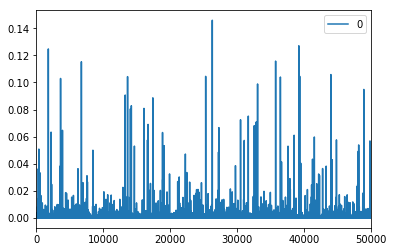

In [97]:
 pd.DataFrame(dists_negative).plot()  

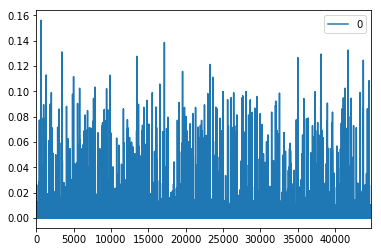

In [98]:
 pd.DataFrame(dists).plot()  

In [102]:
#test_x_predictions = autoencoder.predict(df_test_x_rescaled)
mse = np.mean(np.power(X_train[0:50000] - prediction, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': labels['y']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.4
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


TypeError: list indices must be integers or slices, not str